In [5]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [6]:
dataset = 'datasets/keypoint1000.csv'
model_save_path = 'models/keypoint_classifier.hdf5'
tflite_save_path = 'models/keypoint_classifier.tflite'

# Set number of classes

In [7]:
NUM_CLASSES = 12

# Dataset reading

In [8]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 3) + 1)))

In [9]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 3, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),  # Increased units
    tf.keras.layers.BatchNormalization(),  # Added Batch Normalization
    tf.keras.layers.Dropout(0.3),  # Adjusted dropout rate
    tf.keras.layers.Dense(64, activation='relu'),  # Increased units
    tf.keras.layers.BatchNormalization(),  # Added Batch Normalization
    tf.keras.layers.Dense(32, activation='relu'),  # Increased units
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [12]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 63)                0         
                                                                 
 dense (Dense)               (None, 128)               8192      
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                       

In [13]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [14]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [15]:
es_callback

In [16]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


62/71 [=========================>....] - ETA: 0s - loss: 2.6074 - accuracy: 0.1120
Epoch 1: saving model to models\keypoint_classifier.hdf5
71/71 [==============================] - 3s 11ms/step - loss: 2.5920 - accuracy: 0.1141 - val_loss: 2.4727 - val_accuracy: 0.0873
Epoch 2/1000
36/71 [==============>...............] - ETA: 0s - loss: 2.4347 - accuracy: 0.1415

c:\Users\Ian\git\553.806_Capstone_HandGesture\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


68/71 [===========================>..] - ETA: 0s - loss: 2.4136 - accuracy: 0.1537
Epoch 2: saving model to models\keypoint_classifier.hdf5
71/71 [==============================] - 0s 4ms/step - loss: 2.4132 - accuracy: 0.1544 - val_loss: 2.4273 - val_accuracy: 0.1200
Epoch 3/1000
57/71 [=======================>......] - ETA: 0s - loss: 2.3241 - accuracy: 0.1842
Epoch 3: saving model to models\keypoint_classifier.hdf5
71/71 [==============================] - 0s 4ms/step - loss: 2.3155 - accuracy: 0.1863 - val_loss: 2.3151 - val_accuracy: 0.1997
Epoch 4/1000
57/71 [=======================>......] - ETA: 0s - loss: 2.2631 - accuracy: 0.2034
Epoch 4: saving model to models\keypoint_classifier.hdf5
71/71 [==============================] - 0s 4ms/step - loss: 2.2540 - accuracy: 0.2063 - val_loss: 2.1863 - val_accuracy: 0.2593
Epoch 5/1000
57/71 [=======================>......] - ETA: 0s - loss: 2.2019 - accuracy: 0.2266
Epoch 5: saving model to models\keypoint_classifier.hdf5
71/71 [=======

In [17]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

 1/24 [>.............................] - ETA: 0s - loss: 0.4126 - accuracy: 0.8828

24/24 [==============================] - 0s 2ms/step - loss: 0.4999 - accuracy: 0.8250


In [18]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [19]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 163ms/step
[4.5257248e-10 9.9914014e-01 4.3536192e-09 6.8680452e-12 9.1773718e-09
 4.8753654e-04 1.4703615e-10 2.8830566e-04 2.9390394e-08 4.7135174e-07
 6.7338668e-05 1.6101207e-05]
1


# Confusion matrix

94/94 [==============================] - 0s 1ms/step


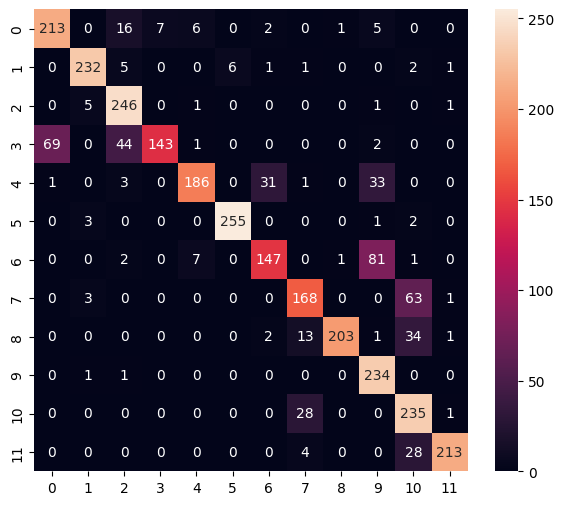

Classification Report
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       250
           1       0.95      0.94      0.94       248
           2       0.78      0.97      0.86       254
           3       0.95      0.55      0.70       259
           4       0.93      0.73      0.82       255
           5       0.98      0.98      0.98       261
           6       0.80      0.62      0.70       239
           7       0.78      0.71      0.75       235
           8       0.99      0.80      0.88       254
           9       0.65      0.99      0.79       236
          10       0.64      0.89      0.75       264
          11       0.98      0.87      0.92       245

    accuracy                           0.82      3000
   macro avg       0.85      0.82      0.82      3000
weighted avg       0.85      0.82      0.82      3000



In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [21]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

c:\Users\Ian\git\553.806_Capstone_HandGesture\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Ian\AppData\Local\Temp\tmp3e8q0xrz\assets


INFO:tensorflow:Assets written to: C:\Users\Ian\AppData\Local\Temp\tmp3e8q0xrz\assets


23992

# Inference test

In [23]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [24]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [25]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [26]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [27]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.3879448e-09 9.9917823e-01 1.6797740e-08 9.0715838e-11 3.6345028e-07
 1.8464272e-04 7.9039069e-09 5.1925163e-04 8.6744258e-08 1.0973359e-05
 7.9646234e-05 2.6701917e-05]
1
